PROJECT PYTHON BENCHEKROUN YANIS A4 DIA

# INTRODUCTION


The Goal of this project is to train a reliable model to determine if a substance is biodegradable or not by using the QSAR biodegradation Data Set provided by UCI.

Here we are dealing with a classification problem. We are trying to predict a discrete value output: Degradable and Not-Degradable.

The challenge here personnally is that I don't have a chemical engineering background. This project was definitely intriguing for me.

But before starting the code part, let's see why (according to me) this project is interesting and can be used for different realms and how it holds significant implications for both environmental and industrial applications. Here are some key points to consider:

1. Environmental Impact:
Biodegradation Assessment: The ability to accurately predict whether a substance is biodegradable or not is crucial for assessing its environmental impact. Knowing the biodegradability of a substance helps in understanding its potential harm or lack thereof in natural ecosystems.


2. Regulatory Compliance:
Environmental Regulations: Many countries have stringent environmental regulations that require companies to ensure the biodegradability of their products, especially in industries such as agriculture, pharmaceuticals, and chemicals. Having a reliable model can aid in compliance with these regulations.


3. Product Development:
Green Chemistry: In product development, particularly in fields like green chemistry, understanding the biodegradability of chemical compounds is essential. This model can assist researchers and developers in designing products that are environmentally friendly and have minimal ecological impact.


4. Risk Assessment:
Ecotoxicology Studies: Predicting the biodegradability of substances is integral to ecotoxicology studies, helping researchers and industries evaluate potential risks associated with the introduction of new compounds into the environment.


5. Data-Driven Decision Making:
QSAR (Quantitative Structure-Activity Relationship): The use of QSAR models allows for data-driven decision-making based on the chemical structure of compounds. This empowers individuals without a deep chemical engineering background, like yourself, to make informed predictions and decisions.


6. Cost and Time Savings:
Reduced Experimental Testing: Building a reliable model for predicting biodegradability can significantly reduce the need for extensive and costly experimental testing. This can lead to substantial savings in both time and resources.


7. Cross-Disciplinary Collaboration:
Integration of Expertise: The project provides an opportunity for cross-disciplinary collaboration between individuals with expertise in data science and those with a background in chemistry or chemical engineering. This collaboration is essential for addressing complex challenges at the intersection of different fields.


8. Educational Value:
Learning Opportunity: For someone without a chemical engineering background, this project offers a unique learning opportunity. It allows for the acquisition of knowledge and skills in the application of data science to real-world problems, bridging the gap between different domains.


9. Potential for Industry Adoption:
Scalability: If successful, the model developed in this project could be scaled up for broader industry adoption, potentially revolutionizing the way companies assess and manage the environmental impact of their products.
In summary, this project goes beyond its technical challenges by addressing a problem with significant real-world implications. It combines environmental responsibility, regulatory compliance, and the application of data science techniques, making it both interesting and strategic in its potential impact.

dataset link : https://archive.ics.uci.edu/dataset/254/qsar+biodegradation

# PART 1 : DATA COLLECTION and PRE PROCESSING


1. data collection

In [80]:
!pip install --upgrade scikit-learn

In [81]:
#Importing standard modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer



# set up display area to show dataframe in jupyter qtconsole
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [82]:
#First glance at the dataset
df = pd.read_csv('biodeg.csv',delimiter=";")  
df.head(3)

,3.919,2.6909,0,0.1,0.2,0.3,0.4,31.4,2,0.5,0.6,0.7,3.106,2.55,9.002,0.8,0.96,1.142,0.9,0.10,0.11,1.201,0.12,0.13,0.14,0.15,1.932,0.011,0.16,0.17,4.489,0.18,0.19,0.20,0.21,2.949,1.591,0.22,7.253,0.23,0.24,RB
0,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.0,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,RB
1,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.0,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,RB
2,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.0,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,RB


In [83]:
df.head()

,3.919,2.6909,0,0.1,0.2,0.3,0.4,31.4,2,0.5,0.6,0.7,3.106,2.55,9.002,0.8,0.96,1.142,0.9,0.10,0.11,1.201,0.12,0.13,0.14,0.15,1.932,0.011,0.16,0.17,4.489,0.18,0.19,0.20,0.21,2.949,1.591,0.22,7.253,0.23,0.24,RB
0,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,RB
1,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,RB
2,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,RB
3,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,RB
4,4.236,3.4286,0,0,0,0,0,28.6,2,4,0,-0.275,3.313,2.522,9.383,1,1.014,1.149,0,0,0,1.119,0,0,0,0,1.980,-0.008,0,10.276,4.746,0,0,0,0,3.351,2.556,0,7.904,0,0,RB


In [84]:
df.shape

(1054, 42)

In [85]:
#We can see that there are total 41 features and 1 target class named 'experimental_class' in this dataset. Also, there are 1055 instances.

In [86]:
df.info() #Valid Dtype for Machine learning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   3.919   1054 non-null   float64
 1   2.6909  1054 non-null   float64
 2   0       1054 non-null   int64  
 3   0.1     1054 non-null   int64  
 4   0.2     1054 non-null   int64  
 5   0.3     1054 non-null   int64  
 6   0.4     1054 non-null   int64  
 7   31.4    1054 non-null   float64
 8   2       1054 non-null   int64  
 9   0.5     1054 non-null   int64  
 10  0.6     1054 non-null   int64  
 11  0.7     1054 non-null   float64
 12  3.106   1054 non-null   float64
 13  2.55    1054 non-null   float64
 14  9.002   1054 non-null   float64
 15  0.8     1054 non-null   int64  
 16  0.96    1054 non-null   float64
 17  1.142   1054 non-null   float64
 18  0.9     1054 non-null   int64  
 19  0.10    1054 non-null   int64  
 20  0.11    1054 non-null   int64  
 21  1.201   1054 non-null   float64
 22  

In [87]:
df.describe()

,3.919,2.6909,0,0.1,0.2,0.3,0.4,31.4,2,0.5,0.6,0.7,3.106,2.55,9.002,0.8,0.96,1.142,0.9,0.10,0.11,1.201,0.12,0.13,0.14,0.15,1.932,0.011,0.16,0.17,4.489,0.18,0.19,0.20,0.21,2.949,1.591,0.22,7.253,0.23,0.24
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.00000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,4.783463,3.069867,0.717268,0.042694,0.981025,0.290323,1.648008,37.061006,1.375712,1.805503,1.438330,-0.197316,3.477195,1.349578,9.938269,3.633776,1.013353,1.131096,0.008539,0.074004,0.029412,1.238763,1.407021,0.039848,0.148008,0.031309,2.21591,-0.001217,0.026565,8.788841,2.666617,0.129981,0.884250,1.276091,0.962049,3.919159,2.559335,0.686907,8.630798,0.051233,0.723909
std,0.546527,0.831621,1.462980,0.256129,2.333867,1.074244,2.225299,9.147145,1.964359,1.775407,3.117742,0.770004,0.584316,0.785670,0.928671,4.457954,0.046487,0.030155,0.101850,0.317618,0.218099,0.096504,4.790620,0.195695,0.355276,0.199636,0.22607,0.159003,0.160886,11.898457,2.096851,0.644351,1.520945,2.274734,1.257261,0.999630,0.642378,1.090701,1.241851,0.319118,2.240238
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.256000,1.544000,0.000000,4.174000,0.000000,0.957000,1.022000,0.000000,0.000000,0.000000,0.863000,0.000000,0.000000,0.000000,0.000000,1.00000,-1.099000,0.000000,0.000000,0.444000,0.000000,0.000000,0.000000,0.000000,2.267000,1.467000,0.000000,4.917000,0.000000,0.000000
25%,4.481000,2.499075,0.000000,0.000000,0.000000,0.000000,0.000000,30.425000,0.000000,0.000000,0.000000,-0.192000,3.105000,0.875000,9.533500,0.000000,0.983000,1.116000,0.000000,0.000000,0.000000,1.182000,0.000000,0.000000,0.000000,0.000000,2.10100,-0.008000,0.000000,0.000000,1.444750,0.000000,0.000000,0.000000,0.000000,3.488250,2.104000,0.000000,7.995750,0.000000,0.000000
50%,4.828000,3.046550,0.000000,0.000000,0.000000,0.000000,1.000000,37.500000,1.000000,2.000000,0.000000,0.000000,3.443000,1.187000,10.040500,2.000000,1.003000,1.130000,0.000000,0.000000,0.000000,1.243000,1.000000,0.000000,0.000000,0.000000,2.24700,0.000000,0.000000,0.000000,2.052000,0.000000,0.000000,0.000000,1.000000,3.727000,2.458500,0.000000,8.500500,0.000000,0.000000
75%,5.125000,3.438725,1.000000,0.000000,1.000000,0.000000,3.000000,43.450000,2.000000,3.000000,2.000000,0.000000,3.825750,1.704250,10.515250,6.000000,1.029000,1.143000,0.000000,0.000000,0.000000,1.296000,2.000000,0.000000,0.000000,0.000000,2.35800,0.005000,0.000000,12.479500,3.141000,0.000000,1.000000,2.000000,2.000000,3.987500,2.870750,1.000000,9.022250,0.000000,0.000000
max,6.496000,9.177500,12.000000,3.000000,36.000000,13.000000,18.000000,60.700000,24.000000,12.000000,44.000000,4.722000,5.701000,4.491000,12.609000,40.000000,1.311000,1.377000,2.000000,3.000000,3.000000,1.641000,147.000000,1.000000,1.000000,3.000000,2.85900,1.073000,1.000000,71.167000,17.537000,8.000000,12.000000,18.000000,7.000000,10.695000,5.825000,8.000000,14.700000,4.000000,27.000000


We have a lot of 0 values in the columns

2. Data Preprocessing

2.1 Missing values

In [88]:
# Drop rows with missing values
df.dropna(inplace=True)


# Fill missing values with a specific value (replace 'your_value' with the actual value you want to use)
df.fillna('your_value', inplace=True)

In [89]:
df.isnull().sum()

3.919     0
2.6909    0
0         0
0.1       0
0.2       0
0.3       0
0.4       0
31.4      0
2         0
0.5       0
0.6       0
0.7       0
3.106     0
2.55      0
9.002     0
0.8       0
0.96      0
1.142     0
0.9       0
0.10      0
0.11      0
1.201     0
0.12      0
0.13      0
0.14      0
0.15      0
1.932     0
0.011     0
0.16      0
0.17      0
4.489     0
0.18      0
0.19      0
0.20      0
0.21      0
2.949     0
1.591     0
0.22      0
7.253     0
0.23      0
0.24      0
RB        0
dtype: int64

In [90]:
df.isnull().sum().sum()

0

Fortunately, there is no missing data we can proceed with the next step

here are the names of the columns : Additional Variable Information
41 molecular descriptors and 1 experimental class:
1) SpMax_L: Leading eigenvalue from Laplace matrix
2) J_Dz(e): Balaban-like index from Barysz matrix weighted by Sanderson electronegativity
3) nHM: Number of heavy atoms
4) F01[N-N]: Frequency of N-N at topological distance 1
5) F04[C-N]: Frequency of C-N at topological distance 4
6) NssssC: Number of atoms of type ssssC
7) nCb-: Number of substituted benzene C(sp2)
8) C%: Percentage of C atoms
9) nCp: Number of terminal primary C(sp3)
10) nO: Number of oxygen atoms
11) F03[C-N]: Frequency of C-N at topological distance 3
12) SdssC: Sum of dssC E-states
13) HyWi_B(m): Hyper-Wiener-like index (log function) from Burden matrix weighted by mass
14) LOC: Lopping centric index
15) SM6_L: Spectral moment of order 6 from Laplace matrix
16) F03[C-O]: Frequency of C - O at topological distance 3
17) Me: Mean atomic Sanderson electronegativity (scaled on Carbon atom)
18) Mi: Mean first ionization potential (scaled on Carbon atom)
19) nN-N: Number of N hydrazines
20) nArNO2: Number of nitro groups (aromatic)
21) nCRX3: Number of CRX3
22) SpPosA_B(p): Normalized spectral positive sum from Burden matrix weighted by polarizability
23) nCIR: Number of circuits
24) B01[C-Br]: Presence/absence of C - Br at topological distance 1
25) B03[C-Cl]: Presence/absence of C - Cl at topological distance 3
26) N-073: Ar2NH / Ar3N / Ar2N-Al / R..N..R
27) SpMax_A: Leading eigenvalue from adjacency matrix (Lovasz-Pelikan index)
28) Psi_i_1d: Intrinsic state pseudoconnectivity index - type 1d
29) B04[C-Br]: Presence/absence of C - Br at topological distance 4
30) SdO: Sum of dO E-states
31) TI2_L: Second Mohar index from Laplace matrix
32) nCrt: Number of ring tertiary C(sp3)
33) C-026: R--CX--R
34) F02[C-N]: Frequency of C - N at topological distance 2
35) nHDon: Number of donor atoms for H-bonds (N and O)
36) SpMax_B(m): Leading eigenvalue from Burden matrix weighted by mass
37) Psi_i_A: Intrinsic state pseudoconnectivity index - type S average
38) nN: Number of Nitrogen atoms
39) SM6_B(m): Spectral moment of order 6 from Burden matrix weighted by mass
40) nArCOOR: Number of esters (aromatic)
41) nX: Number of halogen atoms
42) experimental class: ready biodegradable (RB) and not ready biodegradable (NRB)

In [91]:
#on ne garde que les noms de colonne et on crée une liste avec : 
noms_colonnes = [
    "SpMax_L",
    "J_Dz(e)",
    "nHM",
    "F01[N-N]",
    "F04[C-N]",
    "NssssC",
    "nCb-",
    "C%",
    "nCp",
    "nO",
    "F03[C-N]",
    "SdssC",
    "HyWi_B(m)",
    "LOC",
    "SM6_L",
    "F03[C-O]",
    "Me",
    "Mi",
    "nN-N",
    "nArNO2",
    "nCRX3",
    "SpPosA_B(p)",
    "nCIR",
    "B01[C-Br]",
    "B03[C-Cl]",
    "N-073",
    "SpMax_A",
    "Psi_i_1d",
    "B04[C-Br]",
    "SdO",
    "TI2_L",
    "nCrt",
    "C-026",
    "F02[C-N]",
    "nHDon",
    "SpMax_B(m)",
    "Psi_i_A",
    "nN",
    "SM6_B(m)",
    "nArCOOR",
    "nX",
    "experimental class"
]
df.columns=noms_colonnes


In [92]:
# Filtering rows based on a condition for a specific column, we choose for example the 3rd one

# Selecting Columns:

# Selecting a single column
single_column = df["nHM"]

# Selecting multiple columns
multiple_columns = df[["nCp", "NssssC"]]

#Sorting Data:
# Sorting dataframe by a specific column
sorted_df = df.sort_values(by="nHM", ascending=True)

In [93]:
# Encoding categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['nHM', 'NssssC']
df[categorical_columns] = df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))


2.2 Target Encoding

Since it is a classification problem, Ready Degradability will be encoded as 1, wheres as Non-Ready Degradability will be decoded as 0

In [94]:
df.replace(["RB","NRB"],[1,0], inplace = True) #apply decoding

In [95]:
#rename target for better readability
df.rename(columns = {"experimental class": "degradable"}, inplace = True);

In [96]:
df.head(5)

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,degradable
0,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,1
1,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,1
2,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,1
3,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,1
4,4.236,3.4286,0,0,0,0,0,28.6,2,4,0,-0.275,3.313,2.522,9.383,1,1.014,1.149,0,0,0,1.119,0,0,0,0,1.980,-0.008,0,10.276,4.746,0,0,0,0,3.351,2.556,0,7.904,0,0,1


# PART 2:  DATA VISUALIZATION / DATA PROCESSING 


1. Removing Outliers
If we remove outliers after standardizing, the resulting data won't be standardized anymore (if many outliers are removed, standard deviation could become considerably smaller than 1)

Data Visualization with Matplotlib and Seaborn:

/Users/yanisbenchekroun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/yanisbenchekroun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



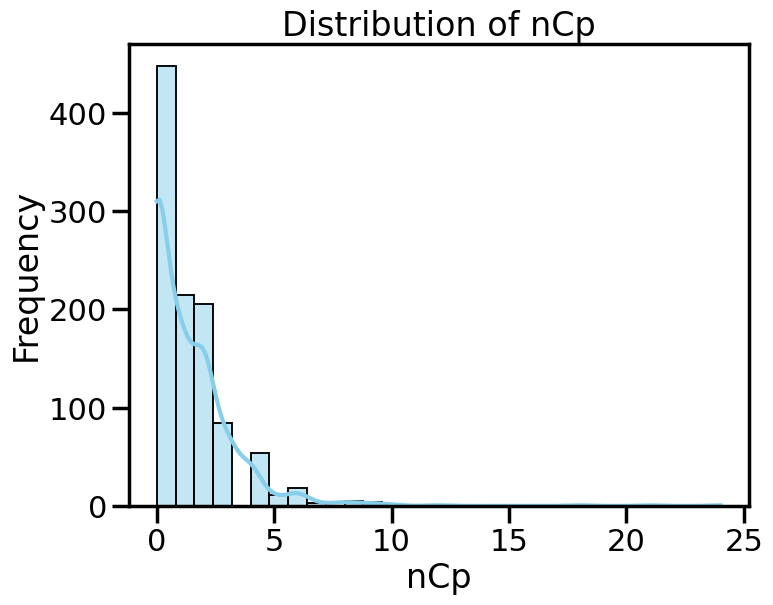

/Users/yanisbenchekroun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/yanisbenchekroun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/yanisbenchekroun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



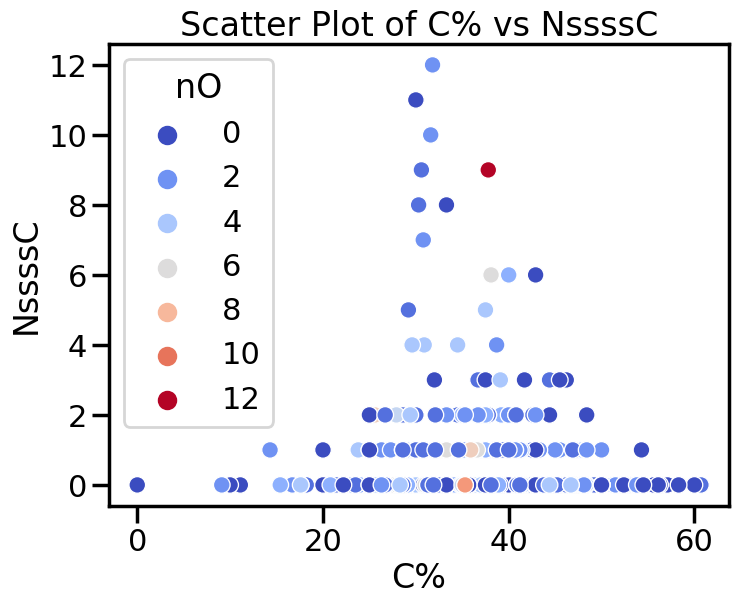

/Users/yanisbenchekroun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/yanisbenchekroun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/yanisbenchekroun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



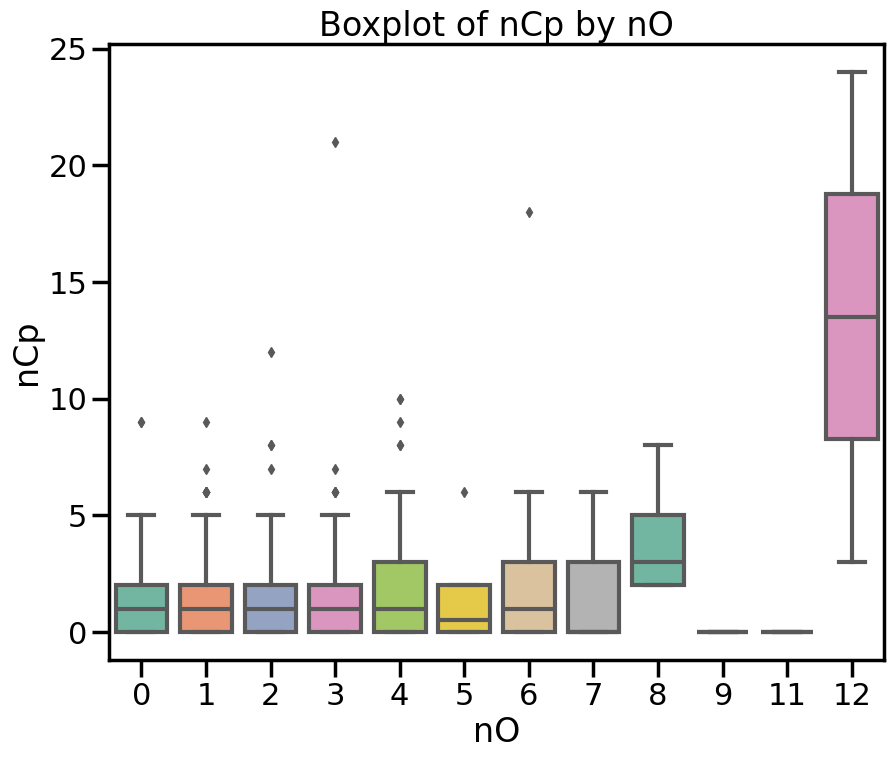

In [97]:
#let's have a quick look before diving into the data processing

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['nCp'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of nCp')
plt.xlabel('nCp')
plt.ylabel('Frequency')
plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='C%', y='NssssC', data=df, hue='nO', palette='coolwarm')
plt.title('Scatter Plot of C% vs NssssC')
plt.xlabel('C%')
plt.ylabel('NssssC')
plt.show()

# Boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(x='nO', y='nCp', data=df, palette='Set2')
plt.title('Boxplot of nCp by nO')
plt.xlabel('nO')
plt.ylabel('nCp')
plt.show()

Data Processing with Pandas:

In [98]:
y = df['degradable']
X_features = df.drop('degradable', axis=1)

In [99]:
from sklearn.neighbors import LocalOutlierFactor

columns= df.columns.tolist()

lof= LocalOutlierFactor()
y_out=lof.fit_predict(X_features)
y_out[0:30]

array([ 1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [100]:
x_score= lof.negative_outlier_factor_
outlier_score= pd.DataFrame()
outlier_score["score"]=x_score

lofthreshold= -3
loffilter= outlier_score["score"]< lofthreshold
outlier_index= outlier_score[loffilter].index.tolist()

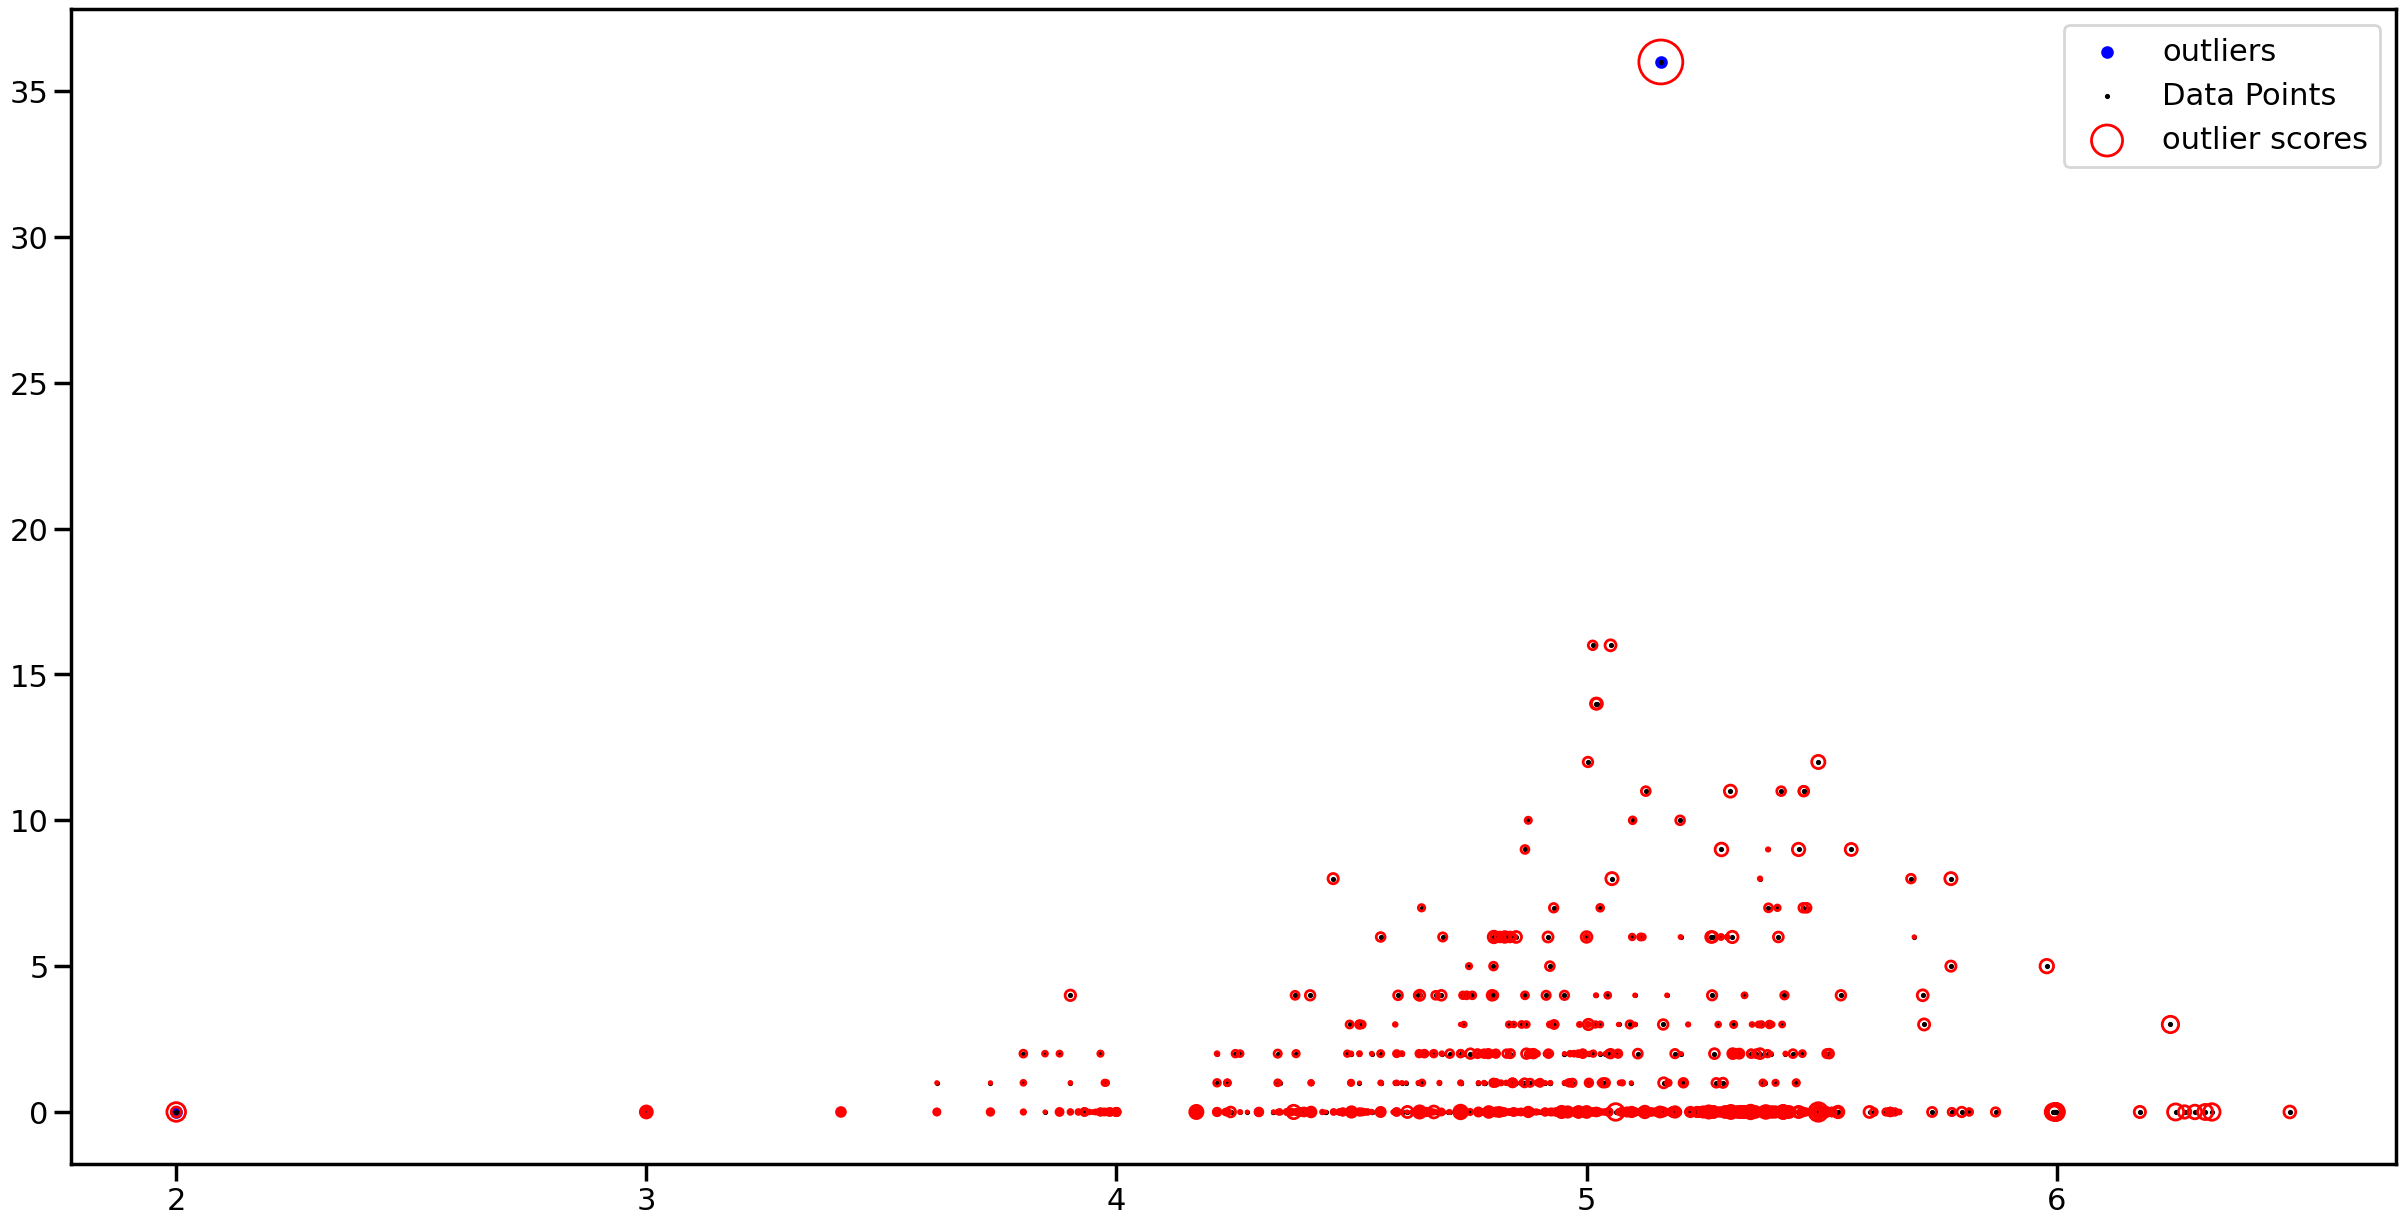

In [101]:
plt.figure(figsize=(30,15))
plt.scatter(X_features.iloc[outlier_index,0], X_features.iloc[outlier_index,4] ,color="blue",s=50,label="outliers")
plt.scatter(X_features.iloc[:,0],X_features.iloc[:,4],color="k",s=3,label="Data Points")

radius=(x_score.max()- x_score)/(x_score.max()-x_score.min())
outlier_score["radius"]=radius
plt.scatter(X_features.iloc[:,0],X_features.iloc[:,4],s=1000*radius,edgecolors="r",facecolors="none",label="outlier scores")
plt.legend()

In [102]:
X_features= X_features.drop(outlier_index)
y= y.drop(outlier_index).values

2. Standardizing

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_transform = scaler.fit_transform(X_features)
X_transform_pd = pd.DataFrame(X_transform, columns = X_features.columns)
X_transform_pd.head(10)

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX
0,-1.140532,-1.156661,-0.497136,-0.164316,-0.458319,-0.27575,-0.741842,-0.692885,-0.192594,-0.455866,-0.494579,0.256634,-1.753242,0.052410,-1.339360,-0.592447,-0.523714,0.432569,-0.078236,-0.233341,-0.13505,-1.410107,-0.161286,-0.203922,-0.41569,-0.15487,-0.012033,-1.311336,-0.165359,-0.740091,-0.537585,-0.202019,-0.581681,-0.566583,-0.765602,-0.605686,-0.922752,-0.636166,-1.113476,-0.16078,-0.323194
1,-1.581369,0.214995,-0.497136,-0.164316,-0.458319,-0.27575,-0.741842,-1.145380,0.316474,1.234749,-0.494579,0.256634,-0.342617,1.572402,-0.914136,-0.816800,-0.093690,0.699448,-0.078236,-0.233341,-0.13505,-1.535490,-0.758725,-0.203922,-0.41569,-0.15487,-1.233431,-0.050344,-0.165359,-0.740091,1.059514,-0.202019,-0.581681,-0.566583,0.031837,-0.845379,-0.220678,-0.636166,-0.834909,-0.16078,-0.323194
2,-3.307672,-0.438255,-0.497136,-0.164316,-0.458319,-0.27575,-0.741842,-1.884824,-0.701662,0.107672,-0.494579,0.256634,-2.375779,-0.553291,-3.678644,-0.816800,2.034931,1.199847,-0.078236,-0.233341,-0.13505,-2.245991,-0.758725,-0.203922,-0.41569,-0.15487,-3.604382,6.904412,-0.165359,-0.037364,-0.637255,-0.202019,-0.581681,-0.566583,0.031837,-0.875466,3.809232,-0.636166,-1.572625,-0.16078,-0.323194
3,-1.018283,0.387779,-0.497136,-0.164316,-0.458319,-0.27575,-0.741842,-0.847395,0.316474,1.234749,-0.494579,-0.095167,-0.049456,1.786629,-0.454849,-0.368093,-0.201196,0.532649,-0.078236,-0.233341,-0.13505,-1.065305,-0.758725,-0.203922,-0.41569,-0.15487,-1.040343,-0.011742,-0.165359,0.129640,1.391905,-0.202019,-0.581681,-0.566583,-0.765602,-0.569582,-0.239400,-0.636166,-0.509375,-0.16078,-0.323194
4,-1.018283,0.429045,-0.497136,-0.164316,-0.458319,-0.27575,-0.741842,-0.935687,0.316474,1.234749,-0.494579,-0.100359,-0.283985,1.492067,-0.614171,-0.592447,0.013816,0.599369,-0.078236,-0.233341,-0.13505,-1.253379,-0.758725,-0.203922,-0.41569,-0.15487,-1.062795,-0.050344,-0.165359,0.123589,0.990365,-0.202019,-0.581681,-0.566583,-0.765602,-0.569582,-0.003814,-0.636166,-0.589544,-0.16078,-0.323194
5,0.396841,2.382519,0.201111,-0.164316,-0.458319,-0.27575,-0.741842,-2.867070,-0.701662,0.671211,-0.494579,0.256634,-1.044481,-0.803223,-0.313108,-0.816800,1.690911,0.732808,-0.078236,-0.233341,-0.13505,-1.190688,-0.758725,-0.203922,-0.41569,-0.15487,-0.972986,2.870525,-0.165359,0.804295,-0.891436,-0.202019,-0.581681,-0.566583,0.031837,0.795366,3.158643,-0.636166,0.543348,-0.16078,-0.323194
6,-0.482981,0.913492,-0.497136,-0.164316,-0.458319,-0.27575,-0.741842,-0.604593,0.825541,0.107672,-0.494579,0.206006,-0.102915,1.423208,-0.171367,0.304967,-0.717225,0.365849,-0.078236,-0.233341,-0.13505,-0.626466,-0.758725,-0.203922,-0.41569,-0.15487,-0.438624,-0.011742,-0.165359,0.194105,0.581672,-0.202019,-0.581681,-0.566583,-0.765602,-0.541500,-0.648163,-0.636166,-0.552294,-0.16078,-0.323194
7,-0.351471,0.005651,-0.497136,-0.164316,-0.458319,-0.27575,0.161419,0.808075,0.316474,-1.019405,-0.494579,0.256634,-0.875482,-0.608123,-0.441664,-0.816800,-0.975240,-0.534868,-0.078236,-0.233341,-0.13505,0.930368,-0.161286,-0.203922,-0.41569,-0.15487,-0.187160,0.264904,-0.165359,-0.740091,-0.763153,-0.202019,-0.581681,-0.566583,-0.765602,-0.293784,-1.000761,-0.636166,-0.561201,-0.16078,-0.323194
8,0.470931,0.649369,-0.497136,-0.164316,0.024799,-0.27575,0.161419,0.454908,-0.701662,1.234749,0.565809,-1.417991,0.009176,-0.119737,0.238475,0.978028,1.196383,-0.134550,-0.078236,2.913766,-0.13505,-0.417495,-0.161286,-0.203922,-0.41569,-0.15487,0.477425,0.033293,-0.165359,1.861958,-0.456991,-0.202019,0.075600,0.330400,0.031837,-0.031024,1.468983,0.301154,0.059905,-0.16078,-0.323194
9,0.230138,-0.400126,-0.497136,-0.164316,-0.458319,-0.27575,0.161419,1.746175,-0.701662,0.107672,-0.494579,-0.135410,-0.196037,-0.921813,0.1296

In [104]:
X_transform_pd.head(10).style.background_gradient(cmap='Blues')

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX
0,-1.140532,-1.156661,-0.497136,-0.164316,-0.458319,-0.275750,-0.741842,-0.692885,-0.192594,-0.455866,-0.494579,0.256634,-1.753242,0.052410,-1.339360,-0.592447,-0.523714,0.432569,-0.078236,-0.233341,-0.135050,-1.410107,-0.161286,-0.203922,-0.415690,-0.154870,-0.012033,-1.311336,-0.165359,-0.740091,-0.537585,-0.202019,-0.581681,-0.566583,-0.765602,-0.605686,-0.922752,-0.636166,-1.113476,-0.160780,-0.323194
1,-1.581369,0.214995,-0.497136,-0.164316,-0.458319,-0.275750,-0.741842,-1.145380,0.316474,1.234749,-0.494579,0.256634,-0.342617,1.572402,-0.914136,-0.816800,-0.093690,0.699448,-0.078236,-0.233341,-0.135050,-1.535490,-0.758725,-0.203922,-0.415690,-0.154870,-1.233431,-0.050344,-0.165359,-0.740091,1.059514,-0.202019,-0.581681,-0.566583,0.031837,-0.845379,-0.220678,-0.636166,-0.834909,-0.160780,-0.323194
2,-3.307672,-0.438255,-0.497136,-0.164316,-0.458319,-0.275750,-0.741842,-1.884824,-0.701662,0.107672,-0.494579,0.256634,-2.375779,-0.553291,-3.678644,-0.816800,2.034931,1.199847,-0.078236,-0.233341,-0.135050,-2.245991,-0.758725,-0.203922,-0.415690,-0.154870,-3.604382,6.904412,-0.165359,-0.037364,-0.637255,-0.202019,-0.581681,-0.566583,0.031837,-0.875466,3.809232,-0.636166,-1.572625,-0.160780,-0.323194
3,-1.018283,0.387779,-0.497136,-0.164316,-0.458319,-0.275750,-0.741842,-0.847395,0.316474,1.234749,-0.494579,-0.095167,-0.049456,1.786629,-0.454849,-0.368093,-0.201196,0.532649,-0.078236,-0.233341,-0.135050,-1.065305,-0.758725,-0.203922,-0.415690,-0.154870,-1.040343,-0.011742,-0.165359,0.129640,1.391905,-0.202019,-0.581681,-0.566583,-0.765602,-0.569582,-0.239400,-0.636166,-0.509375,-0.160780,-0.323194
4,-1.018283,0.429045,-0.497136,-0.164316,-0.458319,-0.275750,-0.741842,-0.935687,0.316474,1.234749,-0.494579,-0.100359,-0.283985,1.492067,-0.614171,-0.592447,0.013816,0.599369,-0.078236,-0.233341,-0.135050,-1.253379,-0.758725,-0.203922,-0.415690,-0.154870,-1.062795,-0.050344,-0.165359,0.123589,0.990365,-0.202019,-0.581681,-0.566583,-0.765602,-0.569582,-0.003814,-0.636166,-0.589544,-0.160780,-0.323194
5,0.396841,2.382519,0.201111,-0.164316,-0.458319,-0.275750,-0.741842,-2.867070,-0.701662,0.671211,-0.494579,0.256634,-1.044481,-0.803223,-0.313108,-0.816800,1.690911,0.732808,-0.078236,-0.233341,-0.135050,-1.190688,-0.758725,-0.203922,-0.415690,-0.154870,-0.972986,2.870525,-0.165359,0.804295,-0.891436,-0.202019,-0.581681,-0.566583,0.031837,0.795366,3.158643,-0.636166,0.543348,-0.160780,-0.323194
6,-0.482981,0.913492,-0.497136,-0.164316,-0.458319,-0.275750,-0.741842,-0.604593,0.825541,0.107672,-0.494579,0.206006,-0.102915,1.423208,-0.171367,0.304967,-0.717225,0.365849,-0.078236,-0.233341,-0.135050,-0.626466,-0.758725,-0.203922,-0.415690,-0.154870,-0.438624,-0.011742,-0.165359,0.194105,0.581672,-0.202019,-0.581681,-0.566583,-0.765602,-0.541500,-0.648163,-0.636166,-0.552294,-0.160780,-0.323194
7,-0.351471,0.005651,-0.497136,-0.164316,-0.458319,-0.275750,0.161419,0.808075,0.316474,-1.019405,-0.494579,0.256634,-0.875482,-0.608123,-0.441664,-0.816800,-0.975240,-0.534868,-0.078236,-0.233341,-0.135050,0.930368,-0.161286,-0.203922,-0.415690,-0.154870,-0.187160,0.264904,-0.165359,-0.740091,-0.763153,-0.202019,-0.581681,-0.566583,-0.765602,-0.293784,-1.000761,-0.636166,-0.561201,-0.160780,-0.323194
8,0.470931,0.649369,-0.497136,-0.164316,0.024799,-0.275750,0.161419,0.454908,-0.701662,1.234749,0.565809,-1.417991,0.009176,-0.119737,0.238475,0.978028,1.196383,-0.134550,-0.078236,2.913766,-0.135050,-0.417495,-0.161286,-0.203922,-0.415690,-0.154870,0.477425,0.033293,-0.165359,1.861958,-0.456991,-0.202019,0.075600,0.330400,0.031837,-0.031024,1.468983,0.301154,0.059905,-0.160780,-0.323194
9,0.230138,-0.400126,-0.497136,-0.164316,-0.458319,-0.275750,0.161419,1.746175,-0.701662,0.107672,

3. Multicollinearity¶


Multicollinearity refers to a situation in which more than two explanatory variables in a multiple regression model are highly linearly related. There's a known problem with variable

In the next step multicolinearity is checked. This becomes a problem when running Regression models. Thus, highly cocorrelated features (|r| > 0.90) will be dropped. When deciding which of two correlated features to keep, the one with the higher correlation to the traget and therefore higher prediction value will be keept.

In [105]:
df.corr().style.background_gradient(cmap='Greens')

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,degradable
SpMax_L,1.000000,0.232298,0.261931,0.021996,0.185165,0.452286,0.422724,0.381057,0.202941,0.259444,0.183314,-0.104899,0.642790,-0.111135,0.911555,0.414570,0.275617,-0.117937,-0.114481,0.114050,0.234615,0.230141,0.171564,-0.010766,0.138320,0.054128,0.918821,0.011282,0.036398,0.258765,-0.033840,0.232425,0.311322,0.137149,0.032386,0.304680,0.099390,0.055935,0.488967,0.086801,0.339561,-0.394873
J_Dz(e),0.232298,1.000000,0.071030,-0.094448,-0.186311,0.344181,-0.260890,-0.300433,0.150926,0.192500,-0.142038,-0.192299,0.043116,0.311963,0.114956,0.119340,0.490988,0.444932,-0.033561,0.125991,0.320938,-0.257514,-0.216146,-0.005555,-0.006189,-0.142508,0.019858,-0.001236,-0.041386,0.110433,-0.041987,-0.203300,-0.113738,-0.181845,0.009341,0.085494,0.513356,-0.089291,0.087484,-0.071937,0.389915,-0.001296
nHM,0.261931,0.071030,1.000000,0.023135,0.004617,0.066116,0.255469,0.095332,-0.122250,-0.106791,-0.015353,0.058868,0.485483,-0.094318,0.221762,-0.045807,0.371542,-0.321016,-0.002687,-0.042958,0.148706,0.511226,0.084339,0.322145,0.552166,-0.051527,0.221237,0.004746,0.292827,-0.075644,-0.060877,0.191803,0.436374,-0.035955,-0.135806,0.463598,0.053017,-0.041867,0.576312,-0.044625,0.539394,-0.302828
F01[N-N],0.021996,-0.094448,0.023135,1.000000,0.449365,0.007328,0.191345,-0.039013,0.024713,0.032897,0.424890,-0.051965,0.087480,-0.068491,0.077044,0.007885,0.026011,0.070784,0.386460,0.019493,-0.022501,-0.008350,0.040776,-0.033975,0.107908,0.308141,0.050565,-0.003690,-0.027550,0.120456,0.073109,-0.033658,0.212598,0.501343,0.134796,-0.005754,0.023116,0.462627,0.040250,-0.015168,0.000702,-0.103166
F04[C-N],0.185165,-0.186311,0.004617,0.449365,1.000000,0.001851,0.372286,0.146231,0.007564,0.085743,0.870495,-0.091332,0.281520,-0.100915,0.298139,0.090061,0.004841,-0.035894,0.032644,0.213281,-0.011962,0.085287,0.524421,-0.064880,0.101888,0.382429,0.269144,0.001509,-0.044181,0.284171,0.091444,-0.035617,0.328985,0.789318,0.209477,0.040908,-0.030830,0.745668,0.146743,-0.043322,-0.021165,-0.234297
NssssC,0.452286,0.344181,0.066116,0.007328,0.001851,1.000000,0.083241,-0.062246,0.463572,0.044537,-0.020659,-0.158376,0.270995,-0.006039,0.408852,0.139959,0.384080,0.479404,-0.023106,-0.041304,0.488309,-0.209805,0.032025,-0.014288,-0.012407,-0.006774,0.339640,0.003900,-0.028546,-0.023828,0.045691,0.230960,-0.029858,-0.038648,0.018447,0.014775,0.294710,-0.078500,0.122067,-0.038546,0.665316,-0.173229
nCb-,0.422724,-0.260890,0.255469,0.191345,0.372286,0.083241,1.000000,0.599074,0.135867,0.115341,0.332979,-0.096814,0.517954,-0.310978,0.508713,0.281458,0.060680,-0.452022,-0.028627,0.182001,-0.051047,0.433855,0.265466,0.088938,0.279774,0.183020,0.514745,0.006829,0.169381,0.204228,-0.014067,-0.123042,0.800254,0.330459,0.113345,0.223820,-0.077206,0.183444,0.402301,0.112344,0.126789,-0.336685
C%,0.381057,-0.300433,0.095332,-0.039013,0.146231,-0.062246,0.599074,1.000000,-0.225022,-0.147246,0.108512,0.026040,0.352174,-0.383962,0.429483,0.059132,-0.090563,-0.682536,-0.135115,0.041494,-0.086252,0.623037,0.262649,0.035618,0.251339,0.138327,0.568633,0.017639,0.144609,0.027560,-0.133671,0.049859,0.409064,0.095168,-0.238199,0.149238,-0.251060,-0.092338,0.280069,0.117286,0.046462,-0.201004
nCp,0.202941,0.150926,-0.122250,0.024713,0.007564,0.463572,0.135867,-0.225022,1.000000,0.189529,-0.015286,0.043429,0.181302,0.262658,0.254715,0.324041,-0.224306,0.174220,-0.058771,-0.076571,0.049549,-0.127640,-0.059256,-0.034042,-0.143712,-0.022760,0.089966,0.001961,-0.067671,0.009836,0.207504,-0.011609,-0.075703,-0.030887,0.012700,-0.017559,-0.179163,-0.109045,0.032339,-0.021646,-0.046110,-0.056620
nO,0.259444,0.192500,-0.106791,0.032897,0.085743,0.044537,0.115341,-0.147246,0.189529,1.000000,0.093480,-0.502250,0.32567

In [106]:
#get critical correlation values
df.corr().applymap(lambda x: x if abs(x)>.100 else "")

/var/folders/vc/s0ytp86d7nbdxvdx3w14djkm0000gn/T/ipykernel_27222/2543266276.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,degradable
SpMax_L,1.0,0.232298,0.261931,,0.185165,0.452286,0.422724,0.381057,0.202941,0.259444,0.183314,-0.104899,0.64279,-0.111135,0.911555,0.41457,0.275617,-0.117937,-0.114481,0.11405,0.234615,0.230141,0.171564,,0.13832,,0.918821,,,0.258765,,0.232425,0.311322,0.137149,,0.30468,,,0.488967,,0.339561,-0.394873
J_Dz(e),0.232298,1.0,,,-0.186311,0.344181,-0.26089,-0.300433,0.150926,0.1925,-0.142038,-0.192299,,0.311963,0.114956,0.11934,0.490988,0.444932,,0.125991,0.320938,-0.257514,-0.216146,,,-0.142508,,,,0.110433,,-0.2033,-0.113738,-0.181845,,,0.513356,,,,0.389915,
nHM,0.261931,,1.0,,,,0.255469,,-0.12225,-0.106791,,,0.485483,,0.221762,,0.371542,-0.321016,,,0.148706,0.511226,,0.322145,0.552166,,0.221237,,0.292827,,,0.191803,0.436374,,-0.135806,0.463598,,,0.576312,,0.539394,-0.302828
F01[N-N],,,,1.0,0.449365,,0.191345,,,,0.42489,,,,,,,,0.38646,,,,,,0.107908,0.308141,,,,0.120456,,,0.212598,0.501343,0.134796,,,0.462627,,,,-0.103166
F04[C-N],0.185165,-0.186311,,0.449365,1.0,,0.372286,0.146231,,,0.870495,,0.28152,-0.100915,0.298139,,,,,0.213281,,,0.524421,,0.101888,0.382429,0.269144,,,0.284171,,,0.328985,0.789318,0.209477,,,0.745668,0.146743,,,-0.234297
NssssC,0.452286,0.344181,,,,1.0,,,0.463572,,,-0.158376,0.270995,,0.408852,0.139959,0.38408,0.479404,,,0.488309,-0.209805,,,,,0.33964,,,,,0.23096,,,,,0.29471,,0.122067,,0.665316,-0.173229
nCb-,0.422724,-0.26089,0.255469,0.191345,0.372286,,1.0,0.599074,0.135867,0.115341,0.332979,,0.517954,-0.310978,0.508713,0.281458,,-0.452022,,0.182001,,0.433855,0.265466,,0.279774,0.18302,0.514745,,0.169381,0.204228,,-0.123042,0.800254,0.330459,0.113345,0.22382,,0.183444,0.402301,0.112344,0.126789,-0.336685
C%,0.381057,-0.300433,,,0.146231,,0.599074,1.0,-0.225022,-0.147246,0.108512,,0.352174,-0.383962,0.429483,,,-0.682536,-0.135115,,,0.623037,0.262649,,0.251339,0.138327,0.568633,,0.144609,,-0.133671,,0.409064,,-0.238199,0.149238,-0.25106,,0.280069,0.117286,,-0.201004
nCp,0.202941,0.150926,-0.12225,,,0.463572,0.135867,-0.225022,1.0,0.189529,,,0.181302,0.262658,0.254715,0.324041,-0.224306,0.17422,,,,-0.12764,,,-0.143712,,,,,,0.207504,,,,,,-0.179163,-0.109045,,,,
nO,0.259444,0.1925,-0.106791,,,,0.115341,-0.147246,0.189529,1.0,,-0.50225,0.32567,0.332237,0.364061,0.840028,0.218303,,,0.236062,,-0.370177,,,-0.127461,,0.228516,,,0.748228,0.351149,,0.104196,,0.200055,,0.341198,,0.109371,0.217071,-0.121916,0.178789


In [107]:
#get critical correlation values
df.corr().applymap(lambda x: x if abs(x)>.90 else "")

/var/folders/vc/s0ytp86d7nbdxvdx3w14djkm0000gn/T/ipykernel_27222/2981242470.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,degradable
SpMax_L,1.0,,,,,,,,,,,,,,0.911555,,,,,,,,,,,,0.918821,,,,,,,,,,,,,,,
J_Dz(e),,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nHM,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F01[N-N],,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F04[C-N],,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NssssC,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nCb-,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C%,,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nCp,,,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nO,,,,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [108]:
df.columns

Index(['SpMax_L', 'J_Dz(e)', 'nHM', 'F01[N-N]', 'F04[C-N]', 'NssssC', 'nCb-',
       'C%', 'nCp', 'nO', 'F03[C-N]', 'SdssC', 'HyWi_B(m)', 'LOC', 'SM6_L',
       'F03[C-O]', 'Me', 'Mi', 'nN-N', 'nArNO2', 'nCRX3', 'SpPosA_B(p)',
       'nCIR', 'B01[C-Br]', 'B03[C-Cl]', 'N-073', 'SpMax_A', 'Psi_i_1d',
       'B04[C-Br]', 'SdO', 'TI2_L', 'nCrt', 'C-026', 'F02[C-N]', 'nHDon',
       'SpMax_B(m)', 'Psi_i_A', 'nN', 'SM6_B(m)', 'nArCOOR', 'nX',
       'degradable'],
      dtype='object')

In [109]:
df = df.drop(columns=["SM6_L","SpMax_A","SM6_B(m)"])

In [110]:
df.columns

Index(['SpMax_L', 'J_Dz(e)', 'nHM', 'F01[N-N]', 'F04[C-N]', 'NssssC', 'nCb-',
       'C%', 'nCp', 'nO', 'F03[C-N]', 'SdssC', 'HyWi_B(m)', 'LOC', 'F03[C-O]',
       'Me', 'Mi', 'nN-N', 'nArNO2', 'nCRX3', 'SpPosA_B(p)', 'nCIR',
       'B01[C-Br]', 'B03[C-Cl]', 'N-073', 'Psi_i_1d', 'B04[C-Br]', 'SdO',
       'TI2_L', 'nCrt', 'C-026', 'F02[C-N]', 'nHDon', 'SpMax_B(m)', 'Psi_i_A',
       'nN', 'nArCOOR', 'nX', 'degradable'],
      dtype='object')

In [111]:
df.corr().applymap(lambda x: x if abs(x)>.90 else "")

/var/folders/vc/s0ytp86d7nbdxvdx3w14djkm0000gn/T/ipykernel_27222/241791385.py:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,nArCOOR,nX,degradable
SpMax_L,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
J_Dz(e),,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nHM,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F01[N-N],,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F04[C-N],,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NssssC,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nCb-,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C%,,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nCp,,,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nO,,,,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


The following variables have been dropped

# PART 3 : MODELING 

1. Exploratory Data Analysis (EDA) 

In [112]:
pd.set_option('use_inf_as_na', True)
from sklearn.base import clone
import matplotlib.colors as mcolors
import plotly.graph_objs as go
import plotly.offline as py
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt



/var/folders/vc/s0ytp86d7nbdxvdx3w14djkm0000gn/T/ipykernel_27222/889947197.py:1: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



/Users/yanisbenchekroun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/yanisbenchekroun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/yanisbenchekroun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/yanisbenchekroun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

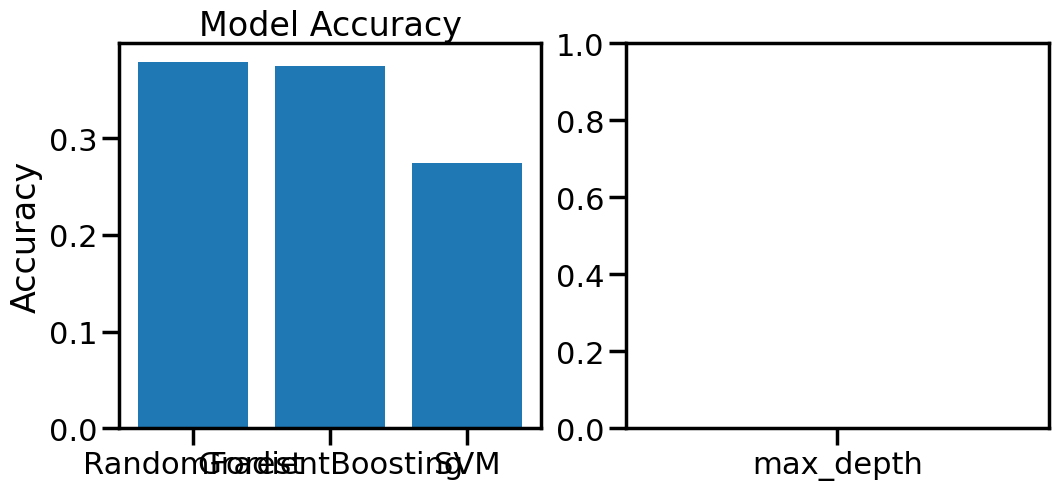

In [113]:


features = ['nCp', 'C%', 'NssssC']  
target = 'nO'  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Define models
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'SVM': SVC()
}

# Model training and evaluation
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)
    
    results[name] = {
        'accuracy': accuracy,
        'classification_report': classification_report_str
    }

# Hyperparameter tuning using GridSearchCV for RandomForest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and retrain the model
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_
best_model_rf.fit(X_train, y_train)

# Visualize the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plotting accuracy
axes[0].bar(results.keys(), [result['accuracy'] for result in results.values()])
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')

# Plotting the best RandomForest hyperparameters
best_params_rf.pop('n_estimators')  # Removing n_estimators for better visualization
axes[1].bar(best_params_rf.keys(), best_params_rf.values())
axes[1].set_title('Best RandomForest Hyperparameters')
axes[1].set_ylabel('Value')

plt.tight_layout()
plt.show()


In [ ]:
bio_df = df.loc[df["degradable"] == 1]
no_bio_df = df.loc[df["degradable"] == 0]

In [ ]:
trace = go.Pie(labels = ['Degradable', 'Not-Degradable'], values = df['degradable'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['green','yellow'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of target variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [ ]:
corr_keep = list(set(df.columns))

In [ ]:
color = sns.color_palette("pastel")

fig, ax1 = plt.subplots(8,4, figsize=(30,60))
k = 0
columns = list(bio_df.columns)
for i in range(8):
    for j in range(4):
            sns.distplot(bio_df[columns[k]], ax = ax1[i][j], color = 'blue', )
            plt.xlabel(columns[k],size=20)
            k += 1
plt.show()

In [ ]:
color = sns.color_palette("pastel")

fig, ax1 = plt.subplots(8,4, figsize=(30,60))
k = 0
columns = list(no_bio_df.columns)
for i in range(8):
    for j in range(4):
        sns.distplot(no_bio_df[columns[k]], ax = ax1[i][j], color = 'gold')
        k += 1
plt.show()

In [ ]:
features = corr_keep

#plot the features side by side
for col in list(filter(lambda x: x != "diagnosis", features)):
    sns.distplot(bio_df[col], label = "Degradable", color = "blue")
    sns.distplot(no_bio_df[col], label = "Not-degradable", color ='green' )
    plt.legend(loc=1, prop={'size': 6})
    plt.show()

2. Correlation Analysis

In [ ]:
corrmat = df.corr()
plt.figure(figsize = (30, 20),)
sns.heatmap(corrmat,
            square=True,
            annot = True,
            annot_kws={'size': 9},
            fmt = ".2f")
plt.title('Correlation between features');
plt.show()

In [ ]:
# Correlation matrix
plt.figure(figsize = (30, 20), dpi = 150)

mask = np.triu(np.ones_like(corrmat, dtype = bool))
sns.heatmap(corrmat,
            mask = mask,
            cmap = 'BuPu',
            annot = True,
            annot_kws={'size': 9},
            linewidths = 0.5,
            fmt = ".2f")

plt.title('Correlation Matrix',
          fontsize = 20,
          weight = 'semibold',
          color = 'Black')
plt.show()

In [ ]:
# Correlation matrix 
f, (ax1, ax2) = plt.subplots(1,2,figsize =(45, 20))

mask = np.zeros_like(corrmat, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap((df.loc[df['degradable'] == 1]).corr(), 
            vmax = .8,
            square=True,
            annot = True,
            annot_kws={'size': 9},
            fmt = ".2f",
            ax = ax1, 
            cmap = 'YlGnBu', 
            mask=mask);
ax1.set_title('Degradable',
             fontsize = 20)

sns.heatmap((df.loc[df['degradable'] == 0]).corr(),
            vmax = .8,
            square=True,
            annot = True,
            annot_kws={'size': 9},
            fmt = ".2f",
            ax = ax2,
            cmap = 'YlGnBu',
            mask=mask);

ax2.set_title('Not-Degradable',
             fontsize = 20)
plt.show()

If there is no correlation between two variables, it means that the variables do not appear to be statistically related, that the value of one variable doesn’t increase or decrease in association with the increase or decrease of the other variable. Here we see that nN-N and nCRX3 are two variables not correlated with the other variables for the Degradable class.

3. Handling Imbalanced Data

In [ ]:
conda install scikit-learn --update-deps


qt-main-5.15.2       | 38.5 MB   | ############9                         |  35% 
















icu-73.1             | 25.4 MB   | ##################2                   |  49% 







qt-main-5.15.2       | 38.5 MB   | #############1                        |  35% 
















icu-73.1             | 25.4 MB   | ##################5                   |  50% 







qt-main-5.15.2       | 38.5 MB   | #############3                        |  36% 
















icu-73.1             | 25.4 MB   | ##################9                   |  51% 







qt-main-5.15.2       | 38.5 MB   | #############5                        |  37% 
















icu-73.1             | 25.4 MB   | ###################2                  |  52% 







qt-main-5.15.2       | 38.5 MB   | #############7                        |  37% 







qt-main-5.15.2       | 38.5 MB   | #############9                        |  38% 
















icu-73.1             | 25.4 MB   | ###################6                  | 

icu-73.1             | 25.4 MB   | ###########################1          |  73% 







qt-main-5.15.2       | 38.5 MB   | ##################9                   |  51% 
















icu-73.1             | 25.4 MB   | ###########################5          |  74% 







qt-main-5.15.2       | 38.5 MB   | ###################1                  |  52% 
















icu-73.1             | 25.4 MB   | ###########################8          |  75% 







qt-main-5.15.2       | 38.5 MB   | ###################3                  |  52% 
















icu-73.1             | 25.4 MB   | ############################          |  76% 







qt-main-5.15.2       | 38.5 MB   | ###################4                  |  53% 
















icu-73.1             | 25.4 MB   | ############################3         |  77% 







qt-main-5.15.2       | 38.5 MB   | ###################7                  |  53% 







qt-main-5.15.2       | 38.5 MB   | ###################8                  |  54% 





icu-73.1             | 25.4 MB   | #################################5    |  91% 







qt-main-5.15.2       | 38.5 MB   | #########################6            |  69% 
















icu-73.1             | 25.4 MB   | #################################8    |  92% 







qt-main-5.15.2       | 38.5 MB   | #########################8            |  70% 
















icu-73.1             | 25.4 MB   | ##################################1   |  92% 







qt-main-5.15.2       | 38.5 MB   | ##########################1           |  71% 
















icu-73.1             | 25.4 MB   | ##################################4   |  93% 







qt-main-5.15.2       | 38.5 MB   | ##########################4           |  72% 
















icu-73.1             | 25.4 MB   | ##################################6   |  94% 







qt-main-5.15.2       | 38.5 MB   | ##########################7           |  72% 
















icu-73.1             | 25.4 MB   | ##################################9   | 

Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

6.1 Testing with imbalanced Data

In [ ]:
print('Not Degradable', round(df['degradable'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Degradable', round(df['degradable'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

As seen before, we can see almost 2/3 of them are non-ready degradable while the rest of 1/3 of them are ready degradable.

There is an significant class imbalance. Class imbalance will lead to a bias towards the majority class. In this case we will perform an oversampling or undersampling method to equalise the data and choose one of them.

Let's try this initially without any method and let's see if this changes anything

In [ ]:
#Selecting the best 30 features
from sklearn.feature_selection import SelectKBest, f_classif
kBest = SelectKBest(f_classif, k = 30)
X_kBestFeatures = kBest.fit_transform(X_transform, y)
X_kBestFeatures.shape

In [ ]:
X_kBestFeatures = X_transform_pd.iloc[:, kBest.get_support(True)]
X_kBestFeatures.columns

In [ ]:
print('Not Degradable', round(df['degradable'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Degradable', round(df['degradable'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

In [ ]:



from sklearn.model_selection import cross_validate

from sklearn.metrics import confusion_matrix
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X_kBestFeatures, y, test_size=0.30, random_state=30)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
# logistic regression object
lr = LogisticRegression(random_state=30)
  
# train the model on train set
clf = lr.fit(X_train, y_train.ravel())
  
predictions = lr.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

In [ ]:
sns.set_context("poster")
disp = plot_confusion_matrix(clf, X_test, y_test, cmap = 'cividis')
plt.grid(False)

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

In [ ]:
colors = ['red' if v == 0 else 'blue' for v in y_train]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
fig, av = plt.subplots(figsize=(24,16))
av.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=colors, **kwarg_params)
plt.suptitle("Benchmark Data before Oversampling")
plt.show()

In [ ]:
colors = ['red' if v == 0 else 'blue' for v in y_train]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
fig, av = plt.subplots(figsize=(24,16))
av.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=colors, **kwarg_params)
plt.suptitle("Benchmark Data after Oversampling")
plt.show()

In [ ]:
lr1 = LogisticRegression(random_state = 30)
clf_smote = lr1.fit(X_train, y_train.ravel())
predictions = lr1.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

In [ ]:
sns.set_context("poster")
disp = confusion_matrix(clf_smote, X_test, y_test, cmap = 'cividis')
plt.grid(False)

4. NearMiss Algorithm – Undersampling¶

In [ ]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()

X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())

print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))

print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

In [ ]:
colors = ['red' if v == 0 else 'blue' for v in y_train]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
fig, av = plt.subplots(figsize=(24,16))
av.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=colors, **kwarg_params)
plt.suptitle("Benchmark Data before Undersampling")
plt.show()

In [ ]:
colors = ['red' if v == 0 else 'blue' for v in y_train_miss]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
fig, av = plt.subplots(figsize=(24,16))
av.scatter(X_train_miss.iloc[:, 0], X_train_miss.iloc[:, 1], c=colors, **kwarg_params)
plt.suptitle("Benchmark Data after Undersampling")
plt.show()

7.1 Model Selection - Comparison
Model selection is the process of selecting one final machine learning model from among a collection of candidate machine learning models for a training dataset. Here we will be using, Cross-validation for evaluating estimator performance. We will also be using the metric AUC_ROC, it is one of the most important evaluation metrics for checking any classification model’s performance.